## Cargar los modelos

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files 
from keras.preprocessing import image
import seaborn as sns

In [2]:
resnet_model = tf.keras.models.load_model('modelos/resnet_model')
xception_model = tf.keras.models.load_model('modelos/xception_model')
efficient_model = tf.keras.models.load_model('modelos/efficient_model')
inceptionResNet_model = tf.keras.models.load_model('modelos/inceptionResNet_model')
denseNet_model = tf.keras.models.load_model('modelos/denseNet_model')

2022-04-12 20:11:25.562543: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Para hacer después, código para mostrar imágenes y sus predicciones:

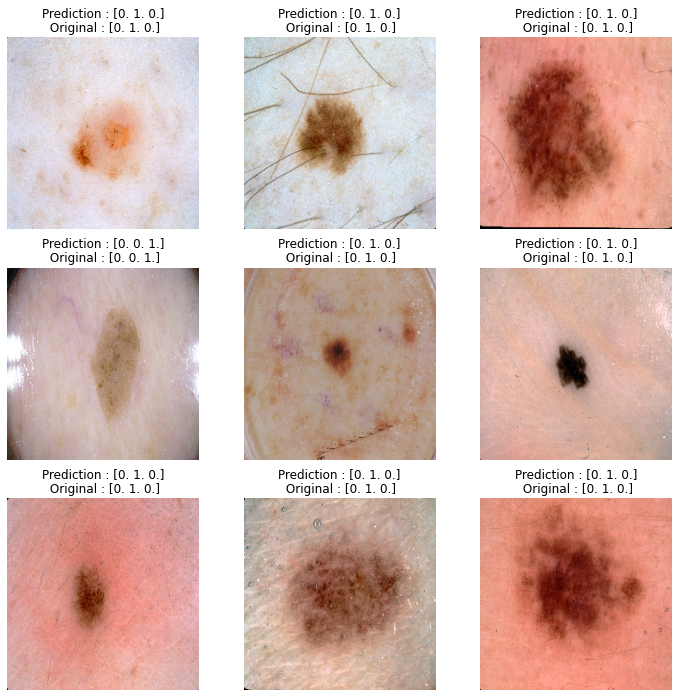

In [5]:
# visualizing the prediting image

plt.figure(figsize=(12,12))

for i in range(9):
  image, label = test_data.next()

  resnet_model_prediction = resnet_model.predict(image)
  
  plt.subplot(3,3,i+1)

  plt.imshow(image[i])
  plt.title(f"Prediction : {tf.round(resnet_model_prediction[i])}\n Original : {label[i]}")
  plt.axis("off")

In [35]:
# visualizing the prediting image

image2, label2 = test_data[1]

resnet_model_prediction2 = resnet_model.predict(image2)

In [37]:
image2[1]

array([[[0.05490196, 0.05490196, 0.0627451 ],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03529412, 0.05490196],
        ...,
        [0.7490196 , 0.7294118 , 0.7137255 ],
        [0.7686275 , 0.7490196 , 0.7372549 ],
        [0.69411767, 0.6392157 , 0.6392157 ]],

       [[0.04313726, 0.03921569, 0.05882353],
        [0.03529412, 0.03529412, 0.03529412],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        ...,
        [0.7137255 , 0.65882355, 0.62352943],
        [0.7137255 , 0.6627451 , 0.6392157 ],
        [0.73333335, 0.7294118 , 0.72156864]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.04705883, 0.04705883, 0.05490196],
        ...,
        [0.73333335, 0.6901961 , 0.68235296],
        [0.68235296, 0.6117647 , 0.5647059 ],
        [0.75294125, 0.7019608 , 0.6784314 ]],

       ...,

       [[0.5372549 , 0.68235296, 0.7568628 ],
        [0.3647059 , 0.47450984, 0.61960787],
        [0.25882354, 0

In [46]:
image2[1]

array([[[0.05490196, 0.05490196, 0.0627451 ],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03921569, 0.03529412, 0.05490196],
        ...,
        [0.7490196 , 0.7294118 , 0.7137255 ],
        [0.7686275 , 0.7490196 , 0.7372549 ],
        [0.69411767, 0.6392157 , 0.6392157 ]],

       [[0.04313726, 0.03921569, 0.05882353],
        [0.03529412, 0.03529412, 0.03529412],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        ...,
        [0.7137255 , 0.65882355, 0.62352943],
        [0.7137255 , 0.6627451 , 0.6392157 ],
        [0.73333335, 0.7294118 , 0.72156864]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.04705883, 0.04705883, 0.05490196],
        ...,
        [0.73333335, 0.6901961 , 0.68235296],
        [0.68235296, 0.6117647 , 0.5647059 ],
        [0.75294125, 0.7019608 , 0.6784314 ]],

       ...,

       [[0.5372549 , 0.68235296, 0.7568628 ],
        [0.3647059 , 0.47450984, 0.61960787],
        [0.25882354, 0

In [40]:
label2[1]

array([0., 0., 1.], dtype=float32)

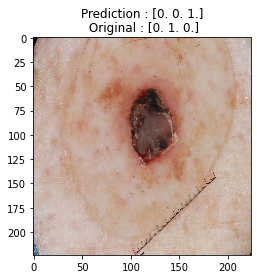

In [45]:
plt.figure(figsize=(4,4))
plt.imshow(image2[1])
plt.title(f"Prediction : {tf.round(resnet_model_prediction2[1])}\n Original : {label[1]}")
plt.show()

# Evaluación de los modelos

In [3]:
test_dir = "/Users/inma/Desktop/tfg/datos/test"
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_data = test_gen.flow_from_directory(test_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )

Found 600 images belonging to 3 classes.


In [10]:
resnet_model_evaluation = resnet_model.evaluate(test_data)
xception_model_evaluation = xception_model.evaluate(test_data)
efficient_model_evaluation = efficient_model.evaluate(test_data)
inceptionResNet_model_evaluation = inceptionResNet_model.evaluate(test_data)
denseNet_model_evaluation = denseNet_model.evaluate(test_data)

10/10 [==============================] - 229s 22s/step - loss: 0.7419 - accuracy: 0.6767


In [11]:
resnet_model_evaluation

[0.9082332253456116, 0.6816666722297668]

#### Guardar resultados

In [12]:
pickle.dump(resnet_model_evaluation, open('variablesGuardadas/primerTest/resnet_model_evaluation.pkl', 'wb'))
pickle.dump(xception_model_evaluation, open('variablesGuardadas/primerTest/xception_model_evaluation.pkl', 'wb'))
pickle.dump(efficient_model_evaluation, open('variablesGuardadas/primerTest/efficient_model_evaluation.pkl', 'wb'))
pickle.dump(inceptionResNet_model_evaluation, open('variablesGuardadas/primerTest/inceptionResNet_model_evaluation.pkl', 'wb'))
pickle.dump(denseNet_model_evaluation, open('variablesGuardadas/primerTest/denseNet_model_evaluation.pkl', 'wb'))

#### Cargar datos

In [6]:
resnet_model_evaluation = pickle.load(open('variablesGuardadas/primerTest/resnet_model_evaluation.pkl', 'rb'))
xception_model_evaluation = pickle.load(open('variablesGuardadas/primerTest/xception_model_evaluation.pkl', 'rb'))
efficient_model_evaluation = pickle.load(open('variablesGuardadas/primerTest/efficient_model_evaluation.pkl', 'rb'))
inceptionResNet_model_evaluation = pickle.load(open('variablesGuardadas/primerTest/inceptionResNet_model_evaluation.pkl', 'rb'))
denseNet_model_evaluation = pickle.load(open('variablesGuardadas/primerTest/denseNet_model_evaluation.pkl', 'rb'))

### Comparación - Métricas de evaluación

#### 1. Accuracy

In [13]:
print(f"Resnet Model Accuarcy : {resnet_model_evaluation[1] *100 : 0.2f}%")
print(f"Xception Model Accuarcy : {xception_model_evaluation[1] *100 : 0.2f}%")
print(f"Efficient Model Accuarcy : {efficient_model_evaluation[1] *100 : 0.2f}%")
print(f"InceptionResNet Model Accuarcy : {inceptionResNet_model_evaluation[1] *100 : 0.2f}%")
print(f"DenseNet Model Accuarcy : {denseNet_model_evaluation[1] *100 : 0.2f}%")

Resnet Model Accuarcy :  68.17%
Xception Model Accuarcy :  67.33%
Efficient Model Accuarcy :  65.50%
InceptionResNet Model Accuarcy :  67.67%
DenseNet Model Accuarcy :  67.67%


#### 2. Test Loss

In [14]:
print(f"Resnet Model TestLoss : {resnet_model_evaluation[0] *100 : 0.2f}%")
print(f"Xception Model TestLoss : {xception_model_evaluation[0] *100 : 0.2f}%")
print(f"Efficient Model TestLoss : {efficient_model_evaluation[0] *100 : 0.2f}%")
print(f"InceptionResNet Model TestLoss : {inceptionResNet_model_evaluation[0] *100 : 0.2f}%")
print(f"DenseNet Model TestLoss : {denseNet_model_evaluation[0] *100 : 0.2f}%")

Resnet Model TestLoss :  90.82%
Xception Model TestLoss :  84.17%
Efficient Model TestLoss :  88.24%
InceptionResNet Model TestLoss :  72.02%
DenseNet Model TestLoss :  74.19%


#### 3. ROC AUC

In [4]:
num_test = len(test_data.filenames)/64

labels = np_utils.to_categorical(np.array(test_data.classes), 3)

In [47]:
predictions_resnet = resnet_model.predict(test_data)
predictions_xception = xception_model.predict(test_data)
predictions_efficient = efficient_model.predict(test_data)
predictions_inception = inceptionResNet_model.predict(test_data)
predictions_denseNet = denseNet_model.predict(test_data)

##### Guardar datos de predicciones:

In [48]:
pickle.dump(predictions_resnet, open('variablesGuardadas/primerTest/predictions_resnet.pkl', 'wb'))
pickle.dump(predictions_xception, open('variablesGuardadas/primerTest/predictions_xception.pkl', 'wb'))
pickle.dump(predictions_efficient, open('variablesGuardadas/primerTest/predictions_efficient.pkl', 'wb'))
pickle.dump(predictions_inception, open('variablesGuardadas/primerTest/predictions_inception.pkl', 'wb'))
pickle.dump(predictions_denseNet, open('variablesGuardadas/primerTest/predictions_denseNet.pkl', 'wb'))

##### Cargar datos:

In [2]:
predictions_resnet = pickle.load(open('variablesGuardadas/primerTest/predictions_resnet.pkl', 'rb'))
predictions_xception = pickle.load(open('variablesGuardadas/primerTest/predictions_xception.pkl', 'rb'))
predictions_efficient = pickle.load(open('variablesGuardadas/primerTest/predictions_efficient.pkl', 'rb'))
predictions_inception = pickle.load(open('variablesGuardadas/primerTest/predictions_inception.pkl', 'rb'))
predictions_denseNet = pickle.load(open('variablesGuardadas/primerTest/predictions_denseNet.pkl', 'rb'))

##### Calcular auc:

In [6]:
roc_auc_all_resnet = roc_auc_score(labels, predictions_resnet)
roc_auc_all_xception = roc_auc_score(labels, predictions_xception)
roc_auc_all_efficient = roc_auc_score(labels, predictions_efficient)
roc_auc_all_inception = roc_auc_score(labels, predictions_inception)
roc_auc_all_denseNet = roc_auc_score(labels, predictions_denseNet)

In [7]:
print(f'Resnet Model AUC: {roc_auc_all_resnet *100 : 0.2f}%')
print(f'Xception Model AUC: {roc_auc_all_xception *100 : 0.2f}%')
print(f'Efficient Model AUC: {roc_auc_all_efficient *100 : 0.2f}%')
print(f'InceptionResNet Model AUC: {roc_auc_all_inception *100 : 0.2f}%')
print(f'DenseNet Model AUC: {roc_auc_all_denseNet *100 : 0.2f}%')

Resnet Model AUC:  47.59%
Xception Model AUC:  50.11%
Efficient Model AUC:  52.04%
InceptionResNet Model AUC:  47.54%
DenseNet Model AUC:  48.51%


Guardar auc:

In [8]:
pickle.dump(roc_auc_all_resnet, open('variablesGuardadas/primerTest/auc_resnet.pkl', 'wb'))
pickle.dump(roc_auc_all_xception, open('variablesGuardadas/primerTest/auc_xception.pkl', 'wb'))
pickle.dump(roc_auc_all_efficient, open('variablesGuardadas/primerTest/auc_efficient.pkl', 'wb'))
pickle.dump(roc_auc_all_inception, open('variablesGuardadas/primerTest/auc_inception.pkl', 'wb'))
pickle.dump(roc_auc_all_denseNet, open('variablesGuardadas/primerTest/auc_denseNet.pkl', 'wb'))

## Visualizar resultados

In [51]:
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 3)
    
    return files, targets

test_filenames, test_targets = load_data_raw(test_dir)

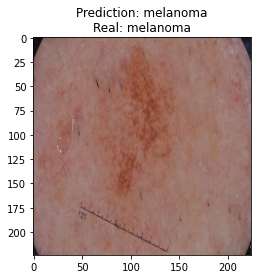

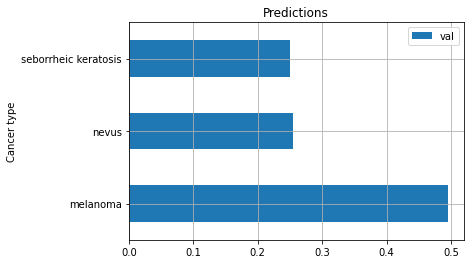

In [52]:
class_2_indices = {'melanoma': 0, 'nevus': 1, 'seborrheic_keratoses': 2}
indices_2_class = {v: k for k, v in class_2_indices.items()}

def plot_prediction(img_file, img_target, model):

    img = image.load_img(img_file, target_size=(224,224))
    img = image.img_to_array(img)/255
    img_expand = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model.predict(img_expand, steps=1)
    image_idx = np.argmax(prediction[0])
    prediction_string = indices_2_class[image_idx]
    
    # Get the real label's name
    label_idx = np.argmax(img_target)
    real_label = indices_2_class[label_idx]
    
    # Plot predictions
    title = "Prediction: {}\nReal: {}".format(prediction_string, real_label)
    
    plt.imshow(img)
    plt.title(title)
    
    pred_df = pd.DataFrame({'Cancer type':['melanoma', 'nevus', 'seborrheic keratosis'], 'val':prediction[0]})
    ax = pred_df.plot.barh(x='Cancer type', y='val', title="Predictions", grid=True)
    
random_index = np.random.randint(0, len(test_data.filenames))
plot_prediction(test_filenames[random_index], test_targets[random_index], inceptionResNet_model)

#### Matriz de confusión

[Text(0, 0.5, 'melanoma'), Text(0, 1.5, 'nevus'), Text(0, 2.5, 'keratoses')]

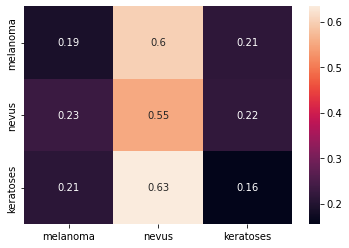

In [53]:
# Confusion matrix for all classes
y_true = test_data.classes
y_pred = [np.argmax(x) for x in predictions_resnet]

labels = ["melanoma", "nevus", "keratoses"]
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize confusion matrix
ax = sns.heatmap(cm, annot=True)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Lo predice todo como nevus, ya que la mayoría de imágenes son nevus.